In [1]:
import numpy as np
# import matplotlib.mathtext

import matplotlib.pyplot as plt
import scipy
from scipy import linalg

In [2]:
Z = np.matrix([[1.0, 0], [0, -1.0]], dtype='complex')
X = np.matrix([[0, 1.0], [1.0, 0]], dtype='complex')  
Y = np.matrix([[0, -1.j], [1.j, 0]], dtype='complex')
I = np.matrix([[1.0, 0],[0, 1.0]],dtype='complex')


def hamil_xymodel(J,Bx,Bz):
    H= J*(np.kron(X,X)+ np.kron(Y,Y))+ Bx*(np.kron(I,X)+np.kron(X,I))+Bz*(np.kron(I,Z)+np.kron(Z,I))
    
   # print(np.linalg.eigh(H))
    return(H)
hamil_xymodel(1,0,0.5)



matrix([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j],
        [ 0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [3]:
def ebz_curve(J,Bx,N,ax):
    Bzlist = np.linspace(0,2,100)
    eval_store1 = np.zeros([len(Bzlist),2**N])
    eval_store2 = np.zeros([len(Bzlist),2**N])
    
    for iBz, Bz in enumerate(Bzlist):
        ham1 = hamil_xymodel(J,Bx,Bz)
        ham2 = hamil_xymodel(J,0.0,Bz)
        eval_store1[iBz,:] = np.linalg.eigvalsh(ham1)
        eval_store2[iBz,:] = np.linalg.eigvalsh(ham2)

    
    for i in range(2):
        
        ax[0,0].set_ylabel(r"$B_x=0.1$" , fontsize=18)
        #ax[0,i].set_xlabel("$B_z$")
        #ax[0,i].set_ylabel("Energy")
        ax[1,0].set_ylabel(r"$B_x=0$" , fontsize=18)
        ax[1,i].set_xlabel(r"$B_z$" , fontsize=18)
        #ax[1,i].set_ylabel("Energy")
#         ax[1,0].set_xticks([0.9])
#         ax[1,1].set_xticks([0,1.6])
#         ax[0,0].set_xticks([0,0.9])
#         ax[0,1].set_xticks([0,1.6])
        # ax[0,0].set_xticks([])
        # ax[1,1].set_xticks([])

#         for label in (ax[0,i].get_xticklabels() + ax[0,i].get_yticklabels()):
#             label.set_fontsize(16)
#         for label in (ax[1,i].get_xticklabels() + ax[1,i].get_yticklabels()):
#             label.set_fontsize(16)
        ax[0,0].set_title('Extrapolation',fontsize=18)
        ax[0,1].set_title('Interpolation',fontsize=18)
        ax[0,i].set_ylim(-4,0)
        ax[1,i].set_ylim(-4,0)
        ax[0,i].set_xlim(-0.1,2)
        ax[1,i].set_xlim(-0.1,2)
        for j in range(2**N):
            
            ax[0,i].plot(Bzlist,eval_store1[:,j],'grey')
            ax[1,i].plot(Bzlist,eval_store2[:,j],'grey')
    return fig, ax


/home/akhil/anaconda3/envs/h2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  from ipykernel import kernelapp as app


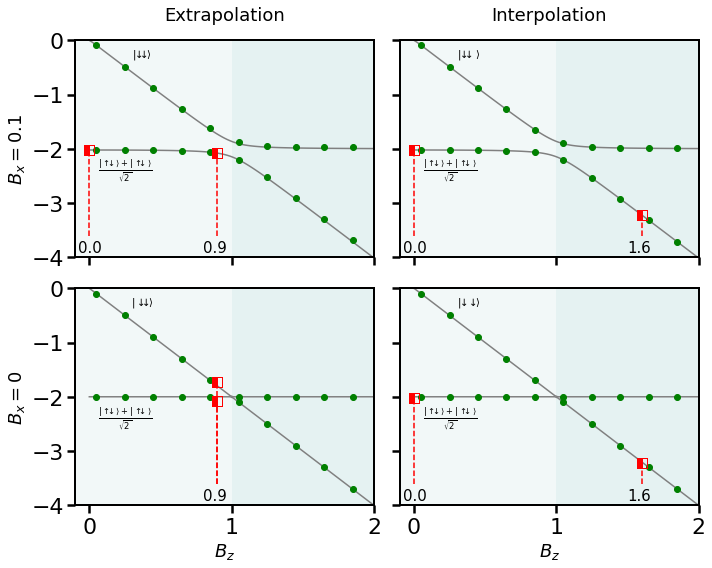

In [4]:
n=11 #number of data points
N=2
Bx=0.1

J=-1
Bztrain1=[0, 0.9]
Bztrain2=[0,1.6]
Bztrain3=[0.9]

# constrained_layout=True)
fig, ax = plt.subplots(2,2,figsize=(10,8),
                       sharex=True,sharey=True,tight_layout=True
                       )

fig.subplots_adjust(wspace=0.0,hspace=0.0)
ebz_curve(J,Bx,N,ax)

train_mark1=np.zeros([len(Bztrain1),2**N])
train_mark2=np.zeros([len(Bztrain2),2**N])
train_mark3=np.zeros([len(Bztrain3),2**N])

added_evals1=np.zeros([n,2])
qasm_circuit_evals1=np.zeros([n,2])

added_evals2=np.zeros([n,2])
qasm_circuit_evals2=np.zeros([n,2])

added_evals3=np.zeros([n,2])
qasm_circuit_evals3=np.zeros([n,2])

added_evals4=np.zeros([n,2])

tag1 =   "Nsite="+str(N)+"Bx="+str(Bx)+"Bztrain"+str(Bztrain1)
tag2 =   "Nsite="+str(N)+"Bx="+str(Bx)+"Bztrain"+str(Bztrain2)
tag3=    "Nsite="+str(N)+"Bx0.0Bztrain"+str(Bztrain2)
tag4 =   "Nsite=" + str(N) + "Bx=0.0Bztrain" + str(Bztrain3) 
    
    
added_evals1=np.loadtxt('NEW/added evals'+tag1+'.txt', dtype='complex')
added_evals2=np.loadtxt('NEW/added evals'+tag2+'.txt', dtype='complex')
added_evals3=np.loadtxt('NEW/added evals'+tag3+'.txt', dtype='complex')
added_evals4=np.loadtxt('NEW/added evals'+tag4+'.txt', dtype='complex')
    
    

for h in range(len(Bztrain1)):
    train_mark1[h,:]=np.linalg.eigvalsh(hamil_xymodel(J,Bx,Bztrain1[h]))
for h in range(len(Bztrain2)):
    train_mark2[h,:]=np.linalg.eigvalsh(hamil_xymodel(J,Bx,Bztrain2[h]))
for h in range(len(Bztrain3)):
    train_mark3[h,:]=np.linalg.eigvalsh(hamil_xymodel(J,Bx,Bztrain3[h]))

ymin2, ymax2 = ax[0,1].get_ybound()
ymin4, ymax4 = ax[1,1].get_ybound()
ymin1, ymax1 = ax[0,0].get_ybound()
ymin3, ymax3 = ax[1,0].get_ybound()

for Bzv in range(10):
    Bzlist_target = [0.05 + 0.2*Bzv]
    
    for ip in range(2):
        ax[0,0].plot(Bztrain1[ip],train_mark1[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax[0,0].plot(Bzlist_target,np.real(added_evals1[ip,Bzv]),'o',color="green")
      
        ax[0,1].plot(Bztrain2[ip],train_mark2[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax[0,1].plot(Bzlist_target,np.real(added_evals2[ip,Bzv]),'o',color="green")
     
        ax[1,0].plot(Bztrain3[0],train_mark3[0,ip],'s',color = "r",fillstyle = "left",markersize = 10)
        
      
        ax[1,0].plot(Bzlist_target,np.real(added_evals4[ip,Bzv]),'o',color="green")
        ax[1,1].plot(Bztrain2[ip],train_mark2[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax[1,1].plot(Bzlist_target,np.real(added_evals3[ip,Bzv]),'o',color="green")
        

# ax[1,1].axvline(Bztrain2[0],ymax = (np.real(added_evals3[0,0])-ymin4)/(ymax4-ymin4),ls="--",color="r") 
# ax[1,1].axvline(Bztrain2[1],ymax = (np.real(added_evals3[0,8])-ymin4)/(ymax4-ymin4),ls="--",color="r")
# ax[0,1].axvline(Bztrain2[0],ymax = (np.real(added_evals2[0,0])-ymin2)/(ymax2-ymin2),ls="--",color="r")
# ax[0,1].axvline(Bztrain2[1],ymax = (np.real(added_evals2[0,8])-ymin2)/(ymax2-ymin2),ls="--",color="r")
# ax[1,0].axvline(Bztrain3[0],ymax = (np.real(added_evals4[0,4])-ymin3)/(ymax3-ymin3),ls="--",color="r") 
# ax[1,0].axvline(Bztrain3[0],ymax = (np.real(added_evals4[1,4])-ymin3)/(ymax3-ymin3),ls="--",color="r")
# ax[0,0].axvline(Bztrain1[0],ymax = (np.real(added_evals1[0,0])-ymin1)/(ymax1-ymin1),ls="--",color="r")
# ax[0,0].axvline(Bztrain1[1],ymax = (np.real(added_evals1[0,4])-ymin1)/(ymax1-ymin1),ls="--",color="r")

ax[1,1].axvline(Bztrain2[0],ymax = (np.real(added_evals3[0,0])-ymin4)/(ymax4-ymin4),ymin=0.1,ls="--",color="r") 
ax[1,1].axvline(Bztrain2[1],ymax = (np.real(added_evals3[0,8])-ymin4)/(ymax4-ymin4),ymin=0.1,ls="--",color="r")
ax[0,1].axvline(Bztrain2[0],ymax = (np.real(added_evals2[0,0])-ymin2)/(ymax2-ymin2),ymin=0.1,ls="--",color="r")
ax[0,1].axvline(Bztrain2[1],ymax = (np.real(added_evals2[0,8])-ymin2)/(ymax2-ymin2),ymin=0.1,ls="--",color="r")
ax[1,0].axvline(Bztrain3[0],ymax = (np.real(added_evals4[0,4])-ymin3)/(ymax3-ymin3),ymin=0.1,ls="--",color="r") 
ax[1,0].axvline(Bztrain3[0],ymax = (np.real(added_evals4[1,4])-ymin3)/(ymax3-ymin3),ymin=0.1,ls="--",color="r")
ax[0,0].axvline(Bztrain1[0],ymax = (np.real(added_evals1[0,0])-ymin1)/(ymax1-ymin1),ymin=0.1,ls="--",color="r")
ax[0,0].axvline(Bztrain1[1],ymax = (np.real(added_evals1[0,4])-ymin1)/(ymax1-ymin1),ymin=0.1,ls="--",color="r")

ax[0,0].text(-0.08,-3.9,"0.0",fontsize='15')
ax[0,0].text(0.8,-3.9,"0.9",fontsize='15')
ax[0,1].text(-0.08,-3.9,"0.0",fontsize='15')
ax[0,1].text(1.5,-3.9,"1.6",fontsize='15')
ax[1,0].text(0.8,-3.9,"0.9",fontsize='15')
# ax[1,0].text(-0.08,-3.9,"0.0",fontsize='15')
ax[1,1].text(-0.08,-3.9,"0.0",fontsize='15')
ax[1,1].text(1.5,-3.9,"1.6",fontsize='15')


# ax[0,0].text(0.12,-1.85,r'$\frac{1}{\sqrt{2}}|01+10\rangle$',fontsize='14')
# ax[0,0].text(0.3,-0.3,r'$|00\rangle$',fontsize='14')
# ax[0,1].text(0.12,-1.85,r'$|01+10\rangle$',fontsize='14')
# ax[0,1].text(0.3,-0.3,r'$|00\rangle$',fontsize='14')
# ax[1,0].text(0.12,-1.85,r'$|01+10\rangle$',fontsize='14')
# ax[1,0].text(0.3,-0.3,r'$|00\rangle$',fontsize='14')
# ax[1,1].text(0.12,-1.85,r'$|01+10\rangle$',fontsize='14')
# ax[1,1].text(0.3,-0.3,r'$|00\rangle$',fontsize='14')

ax[0,0].annotate(r'$\frac{|\uparrow \!\!\!\!\downarrow \rangle + |\uparrow\!\!\!\!\downarrow\rangle}{\sqrt{2}}$',(0.06,-2.45),fontsize='12')
ax[0,0].text(0.3,-0.3,r'$|\!\!\downarrow\!\!\!\! \downarrow\!\!\rangle$',fontsize='10')
# ax[0,1].text(0.06,-2.45,r'$\frac{1}{\sqrt{2}}(|\uparrow\downarrow \rangle + |\uparrow\downarrow\rangle)$',fontsize='10')
ax[0,1].annotate(r'$\frac{|\uparrow \!\!\!\!\downarrow \rangle + |\uparrow\!\!\!\!\downarrow\rangle}{\sqrt{2}}$',(0.06,-2.45),fontsize='12')
ax[0,1].text(0.3,-0.3,r'$|\!\!\downarrow\!\!\!\!\downarrow\rangle$',fontsize='10')
# ax[1,0].text(0.06,-2.45,r'$\frac{1}{\sqrt{2}}(|\!\!\uparrow\downarrow \rangle + |\uparrow\downarrow\rangle)$',fontsize='10')
ax[1,0].annotate(r'$\frac{|\uparrow\!\! \!\!\downarrow \rangle + |\uparrow\!\!\!\!\downarrow\rangle}{\sqrt{2}}$',(0.06,-2.45),fontsize='12')
ax[1,0].text(0.3,-0.3,r'$\!\!|\downarrow\!\!\!\!\downarrow\!\!\rangle$',fontsize='10')
# ax[1,1].text(0.06,-2.45,r'$\frac{1}{\sqrt{2}}(|\!\!\uparrow\downarrow \rangle + |\uparrow\downarrow\rangle)$',fontsize='10')
ax[1,1].annotate(r'$\frac{|\uparrow \!\!\!\!\downarrow \rangle + |\uparrow\!\!\!\!\downarrow\rangle}{\sqrt{2}}$',(0.06,-2.45),fontsize='12')
ax[1,1].text(0.3,-0.3,r'$|\!\!\downarrow\!\!\downarrow\!\!\rangle$',fontsize='10')
for i in range(2):
    
    # ax[0,i].axvspan(-0.1, 1, facecolor='#FFFFF0')
    # ax[0,i].axvspan(1, 2.0, facecolor='#F5F5DC')
    # ax[1,i].axvspan(-0.1, 1, facecolor='#FFFFF0')
    # ax[1,i].axvspan(1, 2.0, facecolor='#F5F5DC')
    col1=(0.0,0.5,0.5,0.05)
    col2=(0.0,0.5,0.5,0.1)
    ax[0,i].axvspan(-0.1, 1, facecolor=col1)
    ax[0,i].axvspan(1, 2.0, facecolor=col2)
    ax[1,i].axvspan(-0.1, 1, facecolor=col1)
    ax[1,i].axvspan(1, 2.0, facecolor=col2)
    
  #  ax[0,i].legend(loc=1,fontsize=12)
  #  ax[1,i].legend(loc=1,fontsize=12)

    
fig.savefig("N=2extrapolation_interpolation_v2.pdf",bbox_inches='tight')


   

In [5]:
paulis = {}
paulis['X'] = np.array([[0,1],[1,0]],dtype=complex)
paulis['Y'] = np.array([[0,-1.j],[1.j,0]],dtype=complex)
paulis['Z'] = np.array([[1,0],[0,-1]],dtype=complex)
paulis['I'] = np.array([[1,0],[0,1]],dtype=complex)


def many_kron(ops):
    # Takes an array of Pauli characters and produces the tensor product
    op = paulis[ops[0]]
    if len(ops) == 1:
        return op

    for opj in ops[1:]:
        op = np.kron(op,paulis[opj])

    return op

def XY_hamiltonian(J, Bx, Bz, N):
    ham = np.zeros([2**N,2**N],dtype=complex)

    # Build hamiltonian matrix
    for isite in range(N):

        # BZ
        oplist = ['I']*N
        oplist[isite] = 'Z'
        ham += Bz*many_kron(oplist)

        # BX
        oplist = ['I']*N
        oplist[isite] = 'X'
        ham += Bx*many_kron(oplist)

        jsite = (isite + 1) % N
        if not(jsite == isite+1):
            continue

        # XX
        oplist = ['I']*N
        oplist[isite] = 'X'
        oplist[jsite] = 'X'
        ham += J*many_kron(oplist)

        # YY
        oplist = ['I']*N
        oplist[isite] = 'Y'
        oplist[jsite] = 'Y'
        ham += J*many_kron(oplist)

    return ham


In [6]:
def crossings(J,Bzmax,N):
    cross_points = np.zeros(N)
    Bzlist = np.linspace(0,Bzmax,300)
    eval_store = np.zeros([len(Bzlist),2**N])
    diff = 0.0
    i=0
    for iBz,Bz in enumerate(Bzlist):
        ham= XY_hamiltonian(J,0.0,Bz,N)
        eval_store[iBz,:] = np.linalg.eigvalsh(ham)
        diff = eval_store[iBz,0]- eval_store[iBz,1]
        #print(diff)
        if np.absolute(diff) < 0.02 :
            cross_points[i]=Bzlist[iBz]
            i=i+1
            print('crossing point', Bzlist[iBz])
    
                  
    for ip in range(N-1):
        diff= cross_points[ip]-cross_points[ip+1]
        if np.absolute(diff)< 0.1:
            cross_points[ip+1]=0                
        
    return cross_points
    

In [7]:
def ebz_curveN5(J,Bx,Bzmax,N):
    Bzlist = np.linspace(0,Bzmax,200)
    eval_store = np.zeros([len(Bzlist),2**N])
    
    for iBz, Bz in enumerate(Bzlist):
        ham = XY_hamiltonian(J,Bx,Bz,N)
       
        eval_store[iBz,:] = np.linalg.eigvalsh(ham)
       
    fig, (ax1,ax2) = plt.subplots(2,figsize=(8,10), sharex=False ,sharey=True,tight_layout=True)
    
    
    
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
        
    for j in range(2**2):   
        ax1.plot(Bzlist,eval_store[:,j],color='grey')
        ax2.plot(Bzlist,eval_store[:,j], color='grey')
    return fig, (ax1,ax2)





AttributeError: 'numpy.ndarray' object has no attribute 'axvspan'

/home/akhil/anaconda3/envs/h2/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


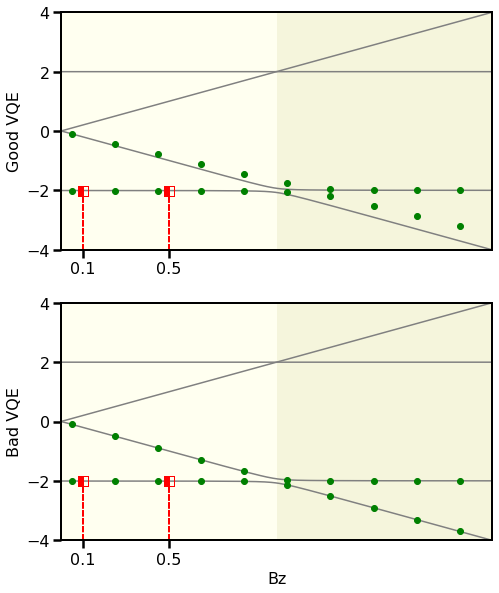

In [13]:
#Bad Vqe curve
N=2
Bx=0.05
Bzmax=2

J=-1
train_points=[0.1, 0.5]

epsilon1=1 #without mixing of excited states
epsilon2=0.8 #with epsilon times ground and (1-epsilon) times first excited state



fig,(ax1,ax2)=ebz_curveN5(J,Bx,Bzmax,N)
added_evals1=np.zeros([n,2])
added_evals2=np.zeros([n,2])
train_mark=np.zeros([len(train_points),2**N])

# tag1 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points) +"epsilon="+str(epsilon)
# tag2 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points) +"epsilon="+str(epsilon)
tag1 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points) +"epsilon="+str(epsilon1)
tag2 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points) +"epsilon="+str(epsilon2)

added_evals1=np.loadtxt('NEW/BadVQE_added evals'+tag1+'.txt', dtype='complex')
added_evals2=np.loadtxt('NEW/BadVQE_added evals'+tag2+'.txt', dtype='complex')
    
for h in range(len(train_points)):
    train_mark[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J,Bx,train_points[h],N))



#ax1.axhline(0,color='k',ls='--')
#ax2.axhline(0,color='k',ls='--')
# ax1.set_ylabel('Good VQE',fontsize='16')
# ax2.set_ylabel('Bad VQE',fontsize='16')
# ax2.set_xlabel('Bz',fontsize='16')

ax1.set_ylabel('Good VQE',fontsize='16')
ax2.set_ylabel('Bad VQE',fontsize='16')
ax2.set_xlabel('Bz',fontsize='16')

# ax1.axvspan(0.0, 1, facecolor='#FFFFF0')
# ax1.axvspan(1, 2.0, facecolor='#F5F5DC')
# ax2.axvspan(0.0, 1, facecolor='#FFFFF0')
# ax2.axvspan(1, 2.0, facecolor='#F5F5DC')
ax1.set_xlim(0,2)
ax2.set_xlim(0,2)
ax1.set_xticks([0.1,0.5])
ax2.set_xticks([0.1,0.5])

col1=(0.0,0.5,0.5,0.05)
col2=(0.0,0.5,0.5,0.1)
ax1.axvspan(-0.1, 1, facecolor=col1)
ax1.axvspan(1, 2.0, facecolor=col2)
ax2.axvspan(-0.1, 1, facecolor=col1)
ax2.axvspan(1, 2.0, facecolor=col2)

ymin, ymax = ax1.get_ybound()
    
for Bzv in range(10):
    Bzlist_target = [0.05 + 0.2*Bzv]
    
   
    for ip in range(len(train_points)):
        ax1.plot(train_points[ip],train_mark[0,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax2.plot(train_points[ip],train_mark[0,0],'s',color = "r",fillstyle = "left",markersize = 10)
        
        ax1.axvline(train_points[ip],ymax = (np.real(added_evals1[0,0])-ymin)/(ymax-ymin),ls="--",color="r") 
        ax2.axvline(train_points[ip],ymax = (np.real(added_evals2[0,0])-ymin)/(ymax-ymin),ls="--",color="r") 

        
        ax1.plot(Bzlist_target,np.real(added_evals1[ip,Bzv]),'o',color='green')
        ax2.plot(Bzlist_target,np.real(added_evals2[ip,Bzv]),'o',color='green')


fig.savefig("NEW/BadVQE_v0.pdf")


/home/akhil/anaconda3/envs/h2/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


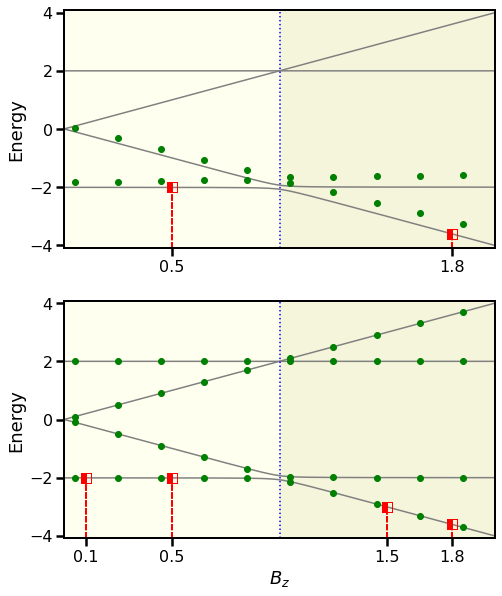

In [48]:
#Noisy VQE without excited states
J=-1
Bx=0.05
N=2
target_pts=11
epsilon=0.8
Bzmax=2
train_points1=[0.5,1.8]
train_points2=[0.1,0.5,1.5,1.8]

train_mark1=np.zeros([len(train_points1),2**N])
train_mark2=np.zeros([len(train_points2),2**N])

fig,(ax1,ax2)=ebz_curveN5(J,Bx,Bzmax,N)
ax1.set_ylabel("Energy" , fontsize=18)
#ax1.set_title('Noisy VQE Epsilon=0.8 ' , fontsize=18)
ax2.set_xlabel("$B_z$", fontsize=18)
ax2.set_ylabel("Energy", fontsize=18)
ax1.axvline(1,color='blue',ls=':')
ax2.axvline(1,color='blue',ls=':')

ax1.axvspan(0.0, 1, facecolor='#FFFFF0')
ax1.axvspan(1, 2.0, facecolor='#F5F5DC')
ax2.axvspan(0.0, 1, facecolor='#FFFFF0')
ax2.axvspan(1, 2.0, facecolor='#F5F5DC')

ax1.set_xlim(0,2)
ax2.set_xlim(0,2)
ax1.set_xticks([0.5,1.8])
ax2.set_xticks([0.1,0.5,1.5,1.8])

ymin, ymax = ax1.get_ybound()

added_evals1=np.zeros([n,len(train_points1)])
added_evals2=np.zeros([n,len(train_points2)])

tag1 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points1) +"epsilon="+str(epsilon)
tag2 =   "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(train_points2) +"epsilon="+str(epsilon)

added_evals1=np.loadtxt('NEW/NoisyVQE_added evals'+tag1+'.txt', dtype='complex')
added_evals2=np.loadtxt('NEW/NoisyVQE_added evals'+tag2+'.txt', dtype='complex')
    
for h in range(len(train_points1)):
    train_mark1[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J,Bx,train_points1[h],N))
for h in range(len(train_points2)):
    train_mark2[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J,Bx,train_points2[h],N))

for Bzv in range(10):
    Bzlist_target = [0.05 + 0.2*Bzv]
   
    for ip in range(len(train_points1)):
        
        #ax1.plot(train_points1[ip],train_mark1[ip,0],'.',color='red')
        ax1.plot(train_points1[ip],train_mark1[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax1.plot(Bzlist_target,np.real(added_evals1[ip,Bzv]),'o',color="green")
        ax1.axvline(train_points1[ip],ymax = (np.real(train_mark1[ip,0])-ymin)/(ymax-ymin),ls="--",color="r") 
       
        
    for ip in range(len(train_points2)):
        ax2.plot(train_points2[ip],train_mark2[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax2.plot(Bzlist_target,np.real(added_evals2[ip,Bzv]),'o',color="green")
        ax2.axvline(train_points2[ip],ymax = (np.real(train_mark2[ip,0])-ymin)/(ymax-ymin),ls="--",color="r") 

# fig.savefig("NEW/NoisyVQE.pdf")    

crossing point 0.0
crossing point 1.0033444816053512
crossing point 1.725752508361204
crossing point 1.7391304347826086
[0.         1.00334448 1.72575251 0.         0.        ]


/home/akhil/anaconda3/envs/h2/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


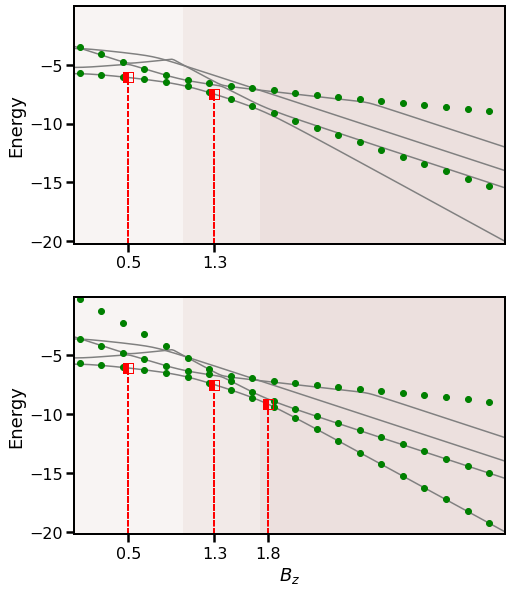

In [49]:
# Plot for N=5 sites
n=21 #number of data points
N=5
Bx=0.1
Bzmax=4
J=-1

Bztrain2=[0.5, 1.3, 1.8]
Bztrain1=[0.5, 1.3]

Bzcrossings = crossings(J,Bzmax,N)
print(Bzcrossings)
train_mark1=np.zeros([len(Bztrain1),2**N])
train_mark2=np.zeros([len(Bztrain2),2**N])

    
fig,(ax1,ax2)=ebz_curveN5(J,Bx,Bzmax,N)
ax1.set_ylabel("Energy" , fontsize=18)
#ax1.set_title('Bx=0.1 N=5 ' , fontsize=18)
ax2.set_xlabel("$B_z$", fontsize=18)
ax2.set_ylabel("Energy", fontsize=18)
added_evals1=np.zeros([n,len(Bztrain1)])
added_evals2=np.zeros([n,len(Bztrain2)])

ymn1, ymx1 = [-20,0.0]
ymn2, ymx2 = [-20,0.0]

for h in range(len(Bztrain2)):
    train_mark2[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J, Bx, Bztrain2[h], N)) 
for h in range(len(Bztrain1)):
    train_mark1[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J, Bx, Bztrain1[h], N))

tag1 =   "Nsite="+str(N)+"Bx"+str(Bx)+"Bztrain"+str(Bztrain1)
tag2 =   "Nsite="+str(N)+"Bx"+str(Bx)+"Bztrain"+str(Bztrain2)
    
added_evals1=np.loadtxt('NEW/added evals'+tag1+'.txt', dtype='complex')
added_evals2=np.loadtxt('NEW/added evals'+tag2+'.txt', dtype='complex')

ax1.set_xlim(0,4)
ax2.set_xlim(0,4)
ax1.axvspan(Bzcrossings[0], Bzcrossings[1], facecolor=(0.5,0.2,0.15,0.05))
ax1.axvspan(Bzcrossings[1], Bzcrossings[2], facecolor=(0.5,0.2,0.15,0.1))
ax1.axvspan(Bzcrossings[2], Bzmax, facecolor=(0.5,0.2,0.15,0.15))
ax2.axvspan(Bzcrossings[0], Bzcrossings[1], facecolor=(0.5,0.2,0.15,0.05))
ax2.axvspan(Bzcrossings[1], Bzcrossings[2], facecolor=(0.5,0.2,0.15,0.1))
ax2.axvspan(Bzcrossings[2], Bzmax, facecolor=(0.5,0.2,0.15,0.15))
ax1.set_xticks([0.5,1.3])
ax2.set_xticks([0.5,1.3,1.8])


for Bzv in range(20):
    Bzlist_target = [0.05 + 0.2*Bzv]
    
    
    for ip in range(len(Bztrain1)):
        
        ax1.plot(Bztrain1[ip],train_mark1[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax1.plot(Bzlist_target,np.real(added_evals1[ip, Bzv]),'o',color="green")
        ax1.axvline(Bztrain1[ip],ymax = (np.real(train_mark1[ip,0])-ymn1)/(ymx1-ymn1),ls="--",color="r") 
    for ip in range(len(Bztrain2)):
        ax2.plot(Bzlist_target,np.real(added_evals2[ip, Bzv]),'o',color="green")
        ax2.plot(Bztrain2[ip],train_mark2[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax2.axvline(Bztrain2[ip],ymax = (np.real(train_mark2[ip,0])-ymn2)/(ymx2-ymn2),ls="--",color="r")
# fig.savefig("NEW/N=5_trainingpt2&3.pdf")    

In [50]:
def ebz_curveN8(J,Bx,Bzmax,N):
    Bzlist = np.linspace(-0.1,Bzmax,150)
    eval_store = np.zeros([len(Bzlist),2**N])
    tag =   "Nsite=" + str(N) + "Bx=0.1"+ "Bztarget[4.05]" +"EvalueBz"
    for iBz, Bz in enumerate(Bzlist):
       # ham = XY_hamiltonian(J,Bx,Bz,N)
        
        eval_store[iBz,:] = np.loadtxt('plotN=8/eval_stor' + tag +str(iBz)+ '.txt', dtype='complex')

    fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,16), sharex=False,sharey=True,tight_layout=True)
    
    ax1.set_ylabel("Energy", fontsize=18)
  #  ax1.set_title('Bx=0.1 N=8 ', fontsize=18)
    ax3.set_ylabel("Energy" , fontsize=18)
    ax3.set_xlabel("$B_z$" , fontsize=18)
    ax2.set_ylabel("Energy" , fontsize=18)
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
        label.set_fontsize(16)
        
    for j in range(2**5):   
        ax1.plot(Bzlist,eval_store[:,j],color='grey')
        ax2.plot(Bzlist,eval_store[:,j], color='grey')
        ax3.plot(Bzlist,eval_store[:,j],color='grey')
      #  ax4.plot(Bzlist,eval_store[:,j], color='grey')
    return fig, (ax1,ax2,ax3)

In [51]:
n=21 #number of data points
N=8
Bx=0.1
Bzmax=4
Bzmin=0
J=1
Bzcrossings =crossings(J,Bzmax,N)
print(Bzcrossings)

crossing point 0.34782608695652173
crossing point 1.0033444816053512
crossing point 1.5250836120401337
crossing point 1.5384615384615383
crossing point 1.8729096989966554
crossing point 1.8862876254180603
[0.34782609 1.00334448 1.52508361 0.         1.8729097  0.
 0.         0.        ]


In [52]:
# Plot for N=8 sites
n=21 #number of data points
N=8
Bx=0.1
Bzmax=4
Bzmin=-0.1
J=1

Bztrain2=[0.0, 0.5, 1.3, 1.7]
Bztrain1=[0.0, 0.5, 1.3]
Bztrain3=[0.0, 0.5, 1.3, 1.7, 1.95]
#Bztrain4=[0,0.5,0.7,0.9,1.3,1.8]


fig,(ax1,ax2,ax3)=ebz_curveN8(J,Bx,Bzmax,N)
added_evals1=np.zeros([n,len(Bztrain1)])
added_evals2=np.zeros([n,len(Bztrain2)])
added_evals3=np.zeros([n,len(Bztrain3)])

ymin1, ymax1 = [-35,0.0]
ymin2, ymax2 = [-35,0.0]
ymin3, ymax3 = [-35,0.0]

train_mark1=np.zeros([len(Bztrain1),2**N])
train_mark2=np.zeros([len(Bztrain2),2**N])
train_mark3=np.zeros([len(Bztrain3),2**N])

for h in range(len(Bztrain2)):
    train_mark2[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J, Bx, Bztrain2[h], N)) 
for h in range(len(Bztrain1)):
    train_mark1[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J, Bx, Bztrain1[h], N))
for h in range(len(Bztrain3)):
    train_mark3[h,:]=np.linalg.eigvalsh(XY_hamiltonian(J, Bx, Bztrain3[h], N))

ax1.set_xlim(-0.1,4)
ax2.set_xlim(-0.1,4)
ax3.set_xlim(-0.1,4)
ax1.axvspan(Bzmin, Bzcrossings[0], facecolor=(0.5,0.2,0.05,0.05))
ax1.axvspan(Bzcrossings[0], Bzcrossings[1], facecolor=(0.5,0.2,0.05,0.1))
ax1.axvspan(Bzcrossings[1], Bzcrossings[2], facecolor=(0.5,0.2,0.05,0.15))
ax1.axvspan(Bzcrossings[2], Bzcrossings[4], facecolor=(0.5,0.2,0.05,0.2))
ax1.axvspan(Bzcrossings[4], Bzmax, facecolor=(0.5,0.2,0.05,0.25))

ax2.axvspan(Bzmin, Bzcrossings[0], facecolor=(0.5,0.2,0.05,0.05))
ax2.axvspan(Bzcrossings[0], Bzcrossings[1], facecolor=(0.5,0.2,0.05,0.1))
ax2.axvspan(Bzcrossings[1], Bzcrossings[2], facecolor=(0.5,0.2,0.05,0.15))
ax2.axvspan(Bzcrossings[2], Bzcrossings[4], facecolor=(0.5,0.2,0.05,0.2))
ax2.axvspan(Bzcrossings[4], Bzmax, facecolor=(0.5,0.2,0.05,0.25))

ax3.axvspan(Bzmin, Bzcrossings[0], facecolor=(0.5,0.2,0.05,0.05))
ax3.axvspan(Bzcrossings[0], Bzcrossings[1], facecolor=(0.5,0.2,0.05,0.1))
ax3.axvspan(Bzcrossings[1], Bzcrossings[2], facecolor=(0.5,0.2,0.05,0.15))
ax3.axvspan(Bzcrossings[2], Bzcrossings[4], facecolor=(0.5,0.2,0.05,0.2))
ax3.axvspan(Bzcrossings[4], Bzmax, facecolor=(0.5,0.2,0.05,0.25))
ax1.set_xticks([0.0, 0.5, 1.3])
ax2.set_xticks([0.0,0.5,1.3,1.7])
ax3.set_xticks([0.0, 0.5, 1.3, 1.7, 1.95])


tag1 =   "Nsite="+str(N)+"Bx0.1"+"Bztrain"+str(Bztrain1)
tag2 =   "Nsite="+str(N)+"Bx0.1"+"Bztrain"+str(Bztrain2)
tag3 =   "Nsite="+str(N)+"Bx0.1"+"Bztrain"+str(Bztrain3)
added_evals1=np.loadtxt('NEW/added evals'+tag1+'.txt', dtype='complex')
added_evals2=np.loadtxt('NEW/added evals'+tag2+'.txt', dtype='complex')
added_evals3=np.loadtxt('NEW/added evals'+tag3+'.txt', dtype='complex')
#print(added_evals1)


for Bzv in range(21):
    Bzlist_target = [0.05 + 0.2*Bzv]
    for ip in range(len(Bztrain1)):
        ax1.plot(Bztrain1[ip],train_mark1[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax1.plot(Bzlist_target,np.real(added_evals1[ip,Bzv]),'o',color="green")
        ax1.axvline(Bztrain1[ip],ymax = (np.real(train_mark1[ip,0])-ymin1)/(ymax1-ymin1),ls="--",color="r")
    for ip in range(len(Bztrain2)):
        
        ax2.plot(Bztrain2[ip],train_mark2[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax2.plot(Bzlist_target,np.real(added_evals2[ip,Bzv]),'o',color="green")
        ax2.axvline(Bztrain2[ip],ymax = (np.real(train_mark2[ip,0])-ymin2)/(ymax2-ymin2),ls="--",color="r")
    for ip in range(len(Bztrain3)):
        ax3.plot(Bzlist_target,np.real(added_evals3[ip,Bzv]),'o',color="green")
        ax3.plot(Bztrain3[ip],train_mark3[ip,0],'s',color = "r",fillstyle = "left",markersize = 10)
        ax3.axvline(Bztrain3[ip],ymax = (np.real(train_mark3[ip,0])-ymin3)/(ymax3-ymin3),ls="--",color="r")
    

OSError: plotN=8/eval_storNsite=8Bx=0.1Bztarget[4.05]EvalueBz0.txt not found.